<a href="https://colab.research.google.com/github/gunwes16/Data-110/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

In [26]:
from IPython.nbformat import v4 as nbf
from datetime import datetime

# Define the cells
cells = []

/usr/local/lib/python3.11/dist-packages/IPython/nbformat.py:12: ShimWarning:

The `IPython.nbformat` package has been deprecated since IPython 4.0. You should import from nbformat instead.



In [3]:
df = pd.read_csv('spotifysongs.csv')

In [29]:
df.shape

(1941, 19)

In [30]:
df.describe()

,duration_ms,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_min
count,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000
mean,228594.973725,2009.520350,59.633179,0.667814,0.721549,5.369397,-5.514082,0.553323,0.103783,0.128173,0.015372,0.181726,0.552966,120.158442,3.809916
std,39249.796103,5.875532,21.501053,0.140608,0.152872,3.615270,1.938950,0.497277,0.096148,0.172584,0.088371,0.140910,0.220845,26.990475,0.654163
min,113000.000000,1998.000000,0.000000,0.129000,0.054900,0.000000,-20.514000,0.000000,0.023200,0.000019,0.000000,0.021500,0.038100,60.019000,1.883333
25%,203506.000000,2004.000000,56.000000,0.581000,0.624000,2.000000,-6.490000,0.000000,0.039700,0.013500,0.000000,0.088400,0.390000,98.986000,3.391767
50%,223186.000000,2010.000000,65.000000,0.676000,0.739000,6.000000,-5.285000,1.000000,0.061000,0.055800,0.000000,0.124000,0.560000,120.028000,3.719767
75%,247946.000000,2015.000000,73.000000,0.765000,0.840000,8.000000,-4.168000,1.000000,0.129000,0.176000,0.000069,0.242000,0.731000,134.199000,4.132433
max,484146.000000,2020.000000,89.000000,0.975000,0.999000,11.000000,-0.276000,1.000000,0.576000,0.976000,0.985000,0.853000,0.973000,210.851000,8.069100


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            2000 non-null   object 
 1   song              2000 non-null   object 
 2   duration_ms       2000 non-null   int64  
 3   explicit          2000 non-null   bool   
 4   year              2000 non-null   int64  
 5   popularity        2000 non-null   int64  
 6   danceability      2000 non-null   float64
 7   energy            2000 non-null   float64
 8   key               2000 non-null   int64  
 9   loudness          2000 non-null   float64
 10  mode              2000 non-null   int64  
 11  speechiness       2000 non-null   float64
 12  acousticness      2000 non-null   float64
 13  instrumentalness  2000 non-null   float64
 14  liveness          2000 non-null   float64
 15  valence           2000 non-null   float64
 16  tempo             2000 non-null   float64


In [5]:
df.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


In [7]:
df.isnull().sum()
df.duplicated().sum()

np.int64(59)

In [6]:
print("Missing values per column:\n", df.isnull().sum())
print("\nNumber of duplicate rows:", df.duplicated().sum())

Missing values per column:
 artist              0
song                0
duration_ms         0
explicit            0
year                0
popularity          0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
genre               0
dtype: int64

Number of duplicate rows: 59


In [8]:
df.drop_duplicates(inplace=True)

In [9]:
print("✅ Duplicates removed. New shape of the DataFrame:", df.shape)

✅ Duplicates removed. New shape of the DataFrame: (1941, 18)


In [10]:
df = df.drop_duplicates()
df = df.dropna(how='any')
df.columns = df.columns.str.lower().str.replace(' ', '_')

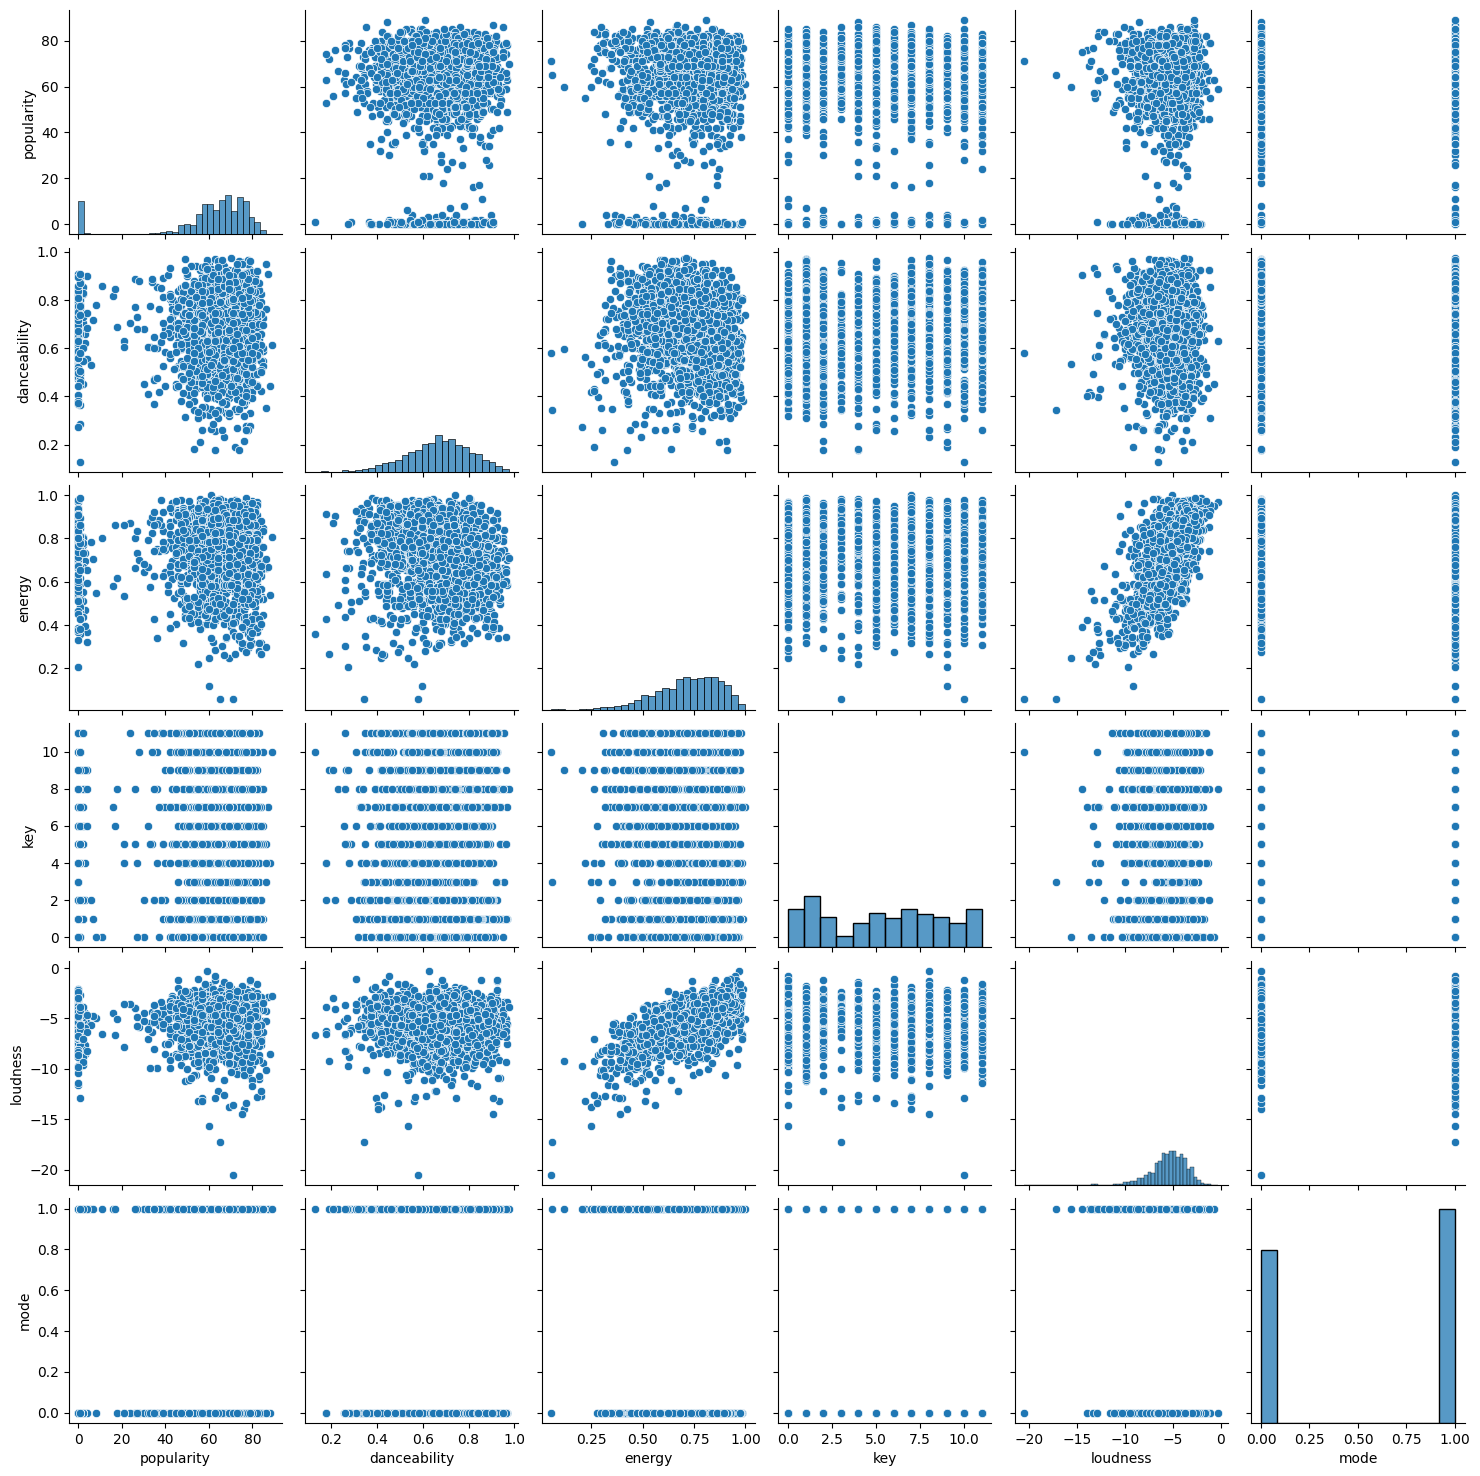

In [32]:
cols_select=df.columns[5:11]
sns.pairplot(df[cols_select])
plt.savefig('plot0.png')

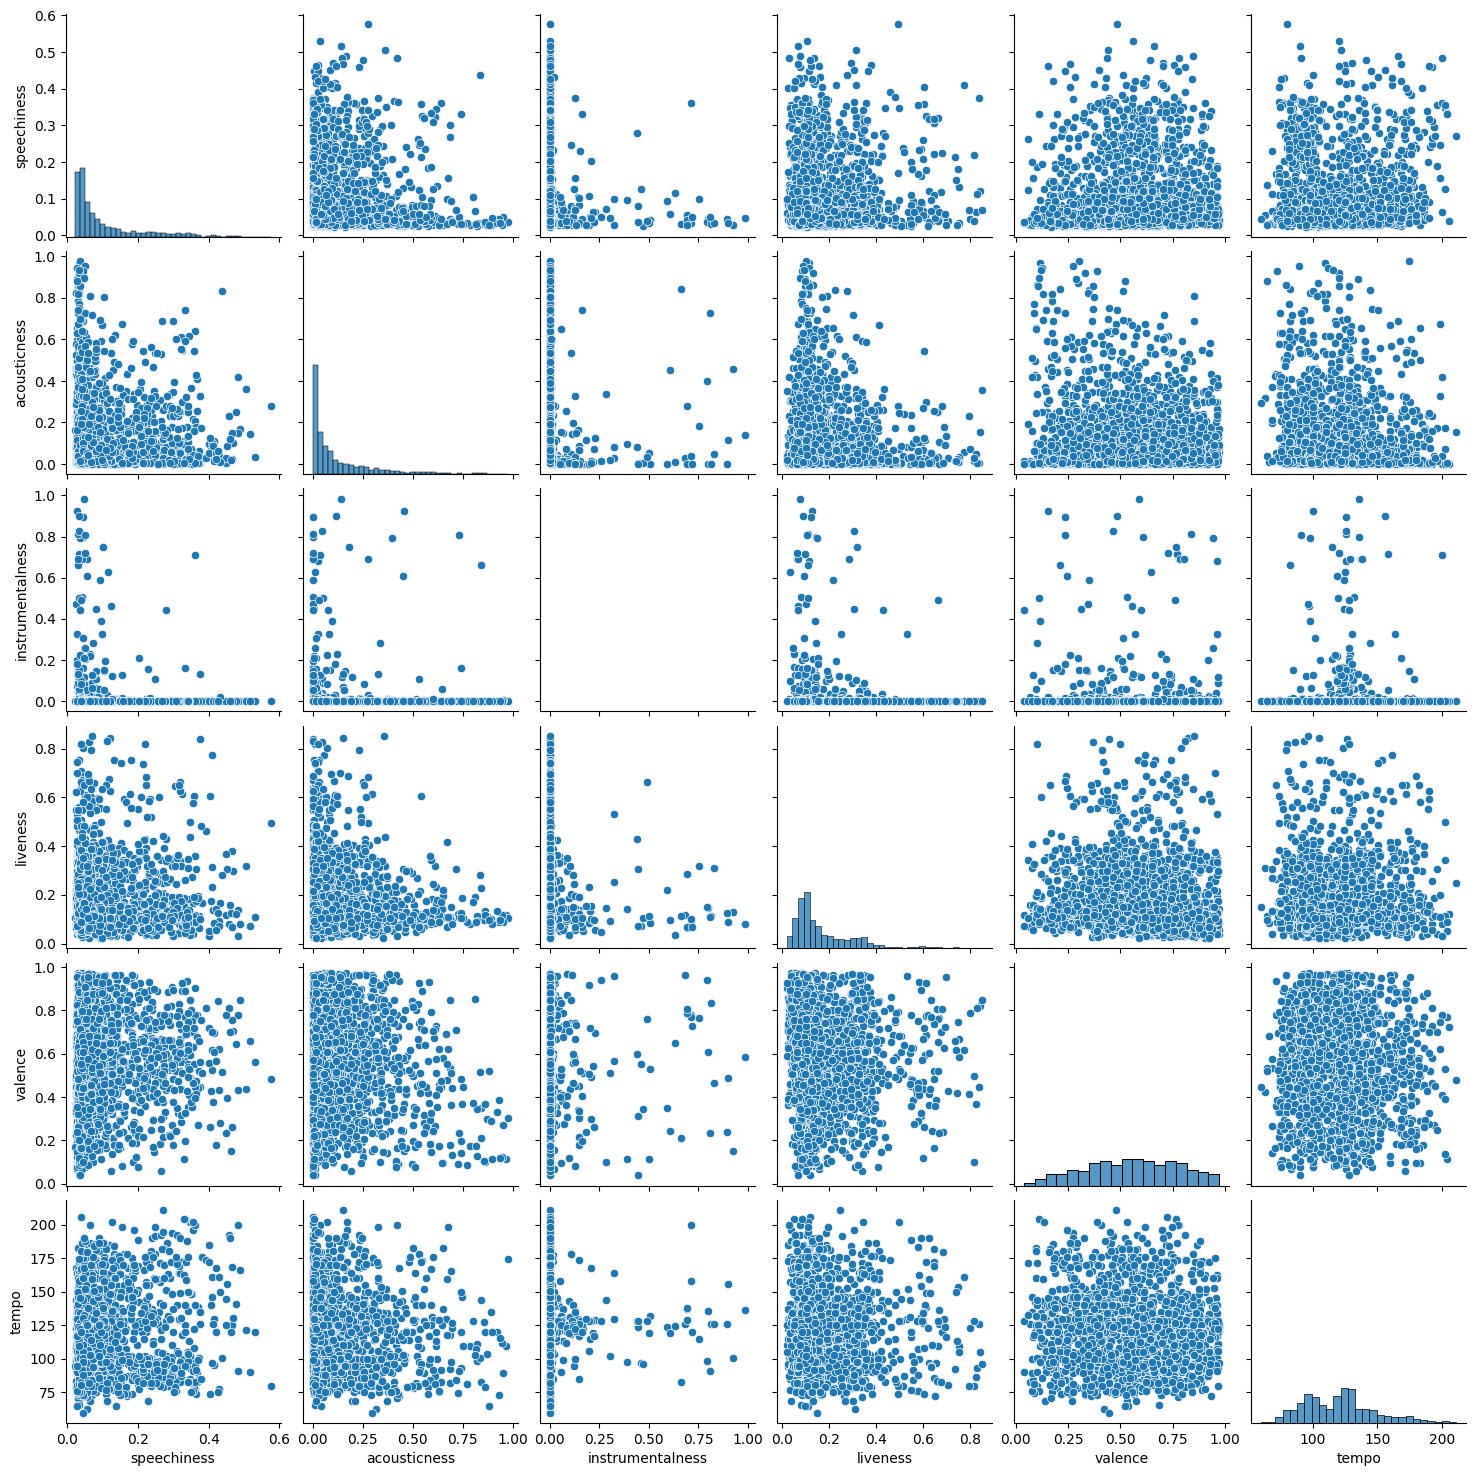

In [35]:
cols_select2=df.columns[11:17]
sns.pairplot(df[cols_select2])

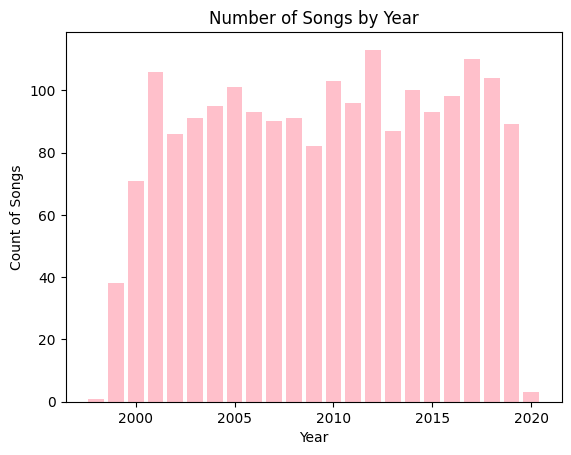

In [40]:
plt.bar(df['year'].value_counts().sort_index().index, # This accesses the years and make sure they are displayed in ascending order
        df['year'].value_counts().sort_index().values, color='pink') # This access the count of the songs by year and makes sure they are displayed in ascending order

plt.xlabel('Year')
plt.ylabel('Count of Songs')
plt.title('Number of Songs by Year')
plt.savefig('plot1.png')
plt.show()

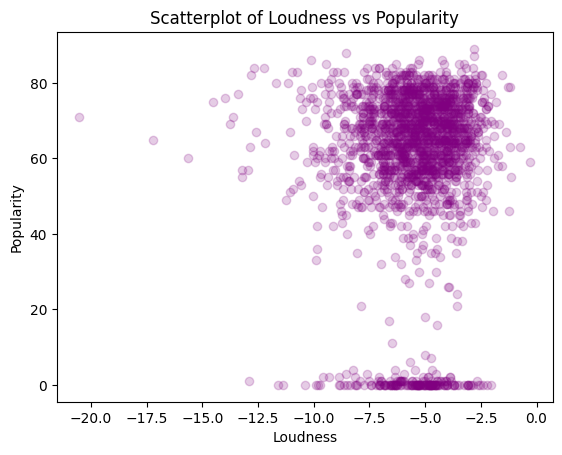

In [43]:
plt.scatter(df['loudness'], df['popularity'], color= 'purple', alpha=0.2)
plt.xlabel('Loudness')
plt.ylabel('Popularity')
plt.title('Scatterplot of Loudness vs Popularity')
plt.savefig('plot2.png')
plt.show()

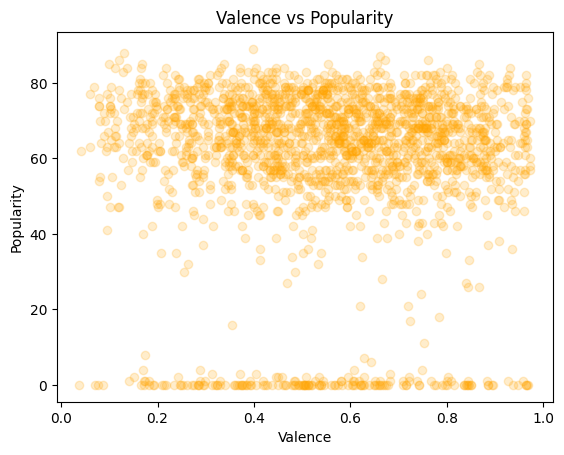

In [45]:
plt.scatter(df['valence'], df['popularity'], color='orange', alpha=0.2)
plt.xlabel('Valence')
plt.ylabel('Popularity')
plt.title('Valence vs Popularity')
plt.savefig('plot5.png')
plt.show()

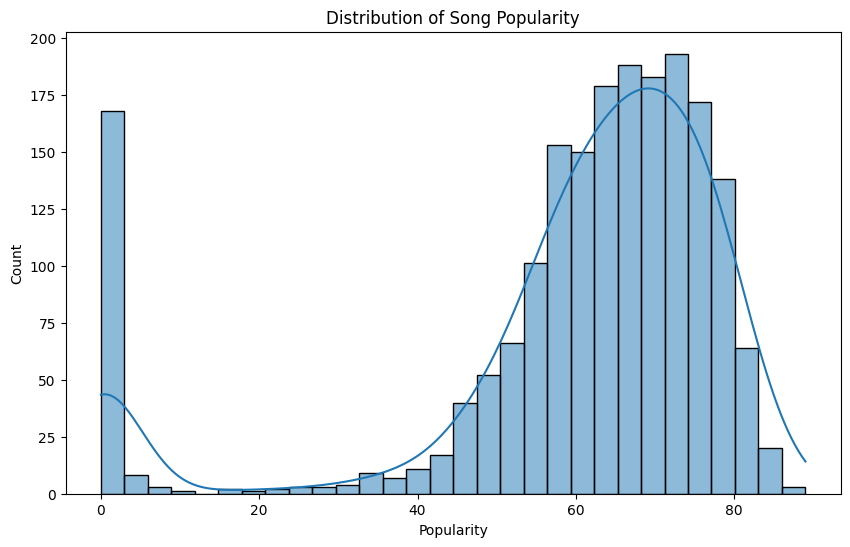

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(df['popularity'], bins=30, kde=True)
plt.title('Distribution of Song Popularity')
plt.xlabel('Popularity')
plt.ylabel('Count')
plt.show()

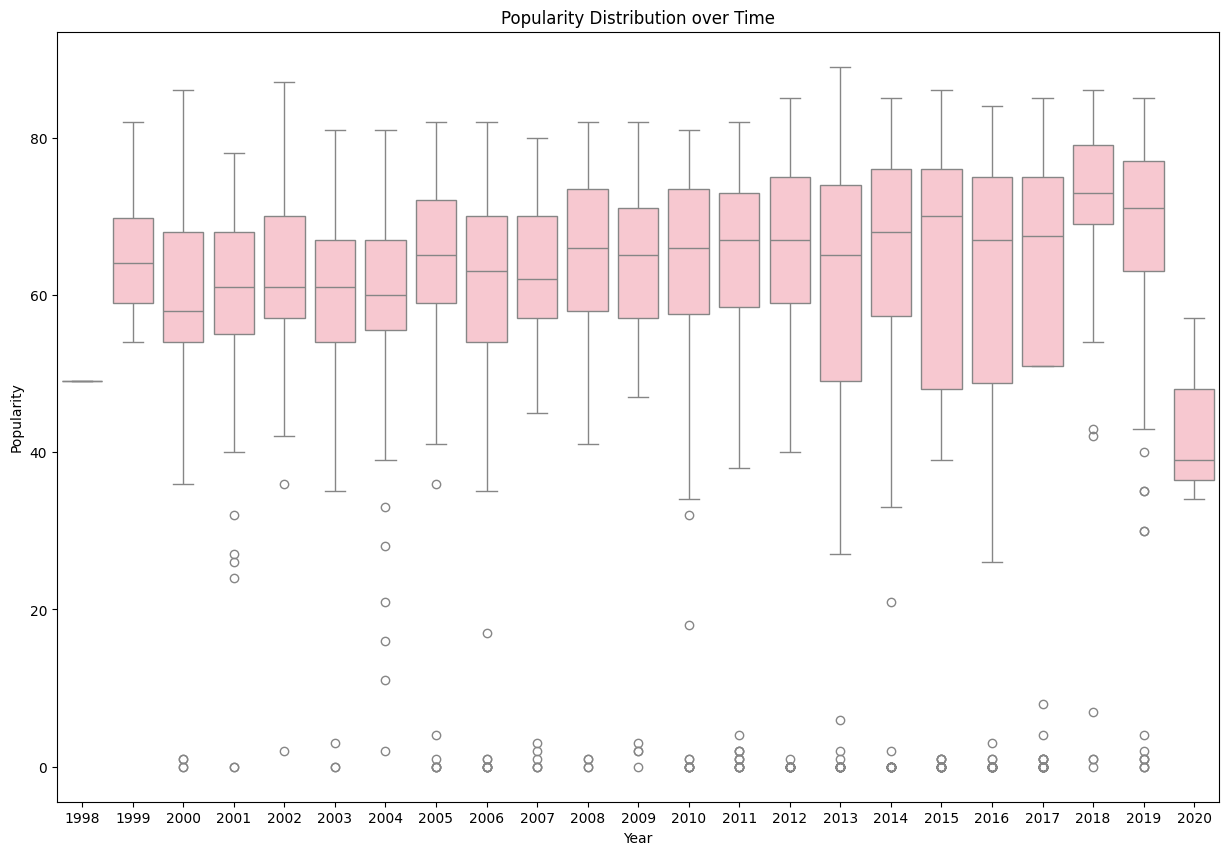

In [46]:
plt.figure(figsize=(15,10))
sns.boxplot(x='year', y='popularity', data=df, color='pink')
plt.xlabel('Year')
plt.ylabel('Popularity')
plt.title('Popularity Distribution over Time')
plt.savefig('plot7.png')
plt.show()

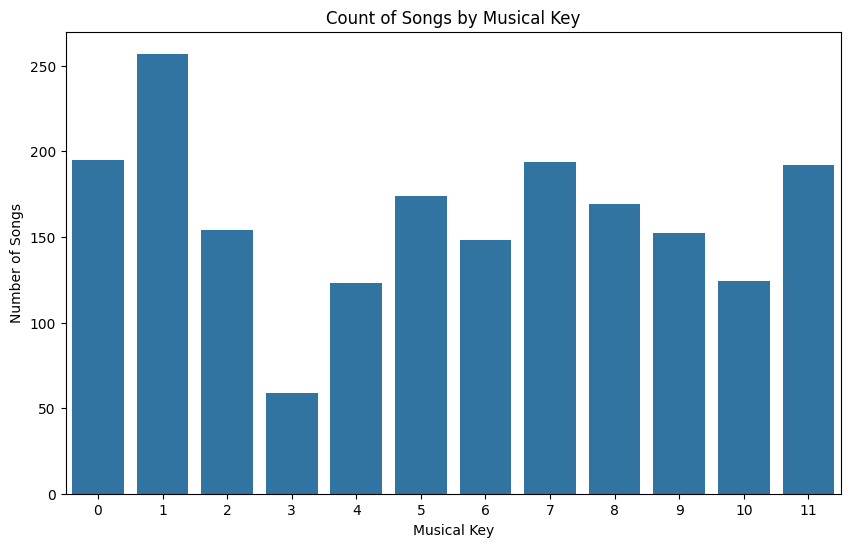

In [13]:
plt.figure(figsize=(10, 6))
sns.countplot(x='key', data=df)
plt.title('Count of Songs by Musical Key')
plt.xlabel('Musical Key')
plt.ylabel('Number of Songs')
plt.show()

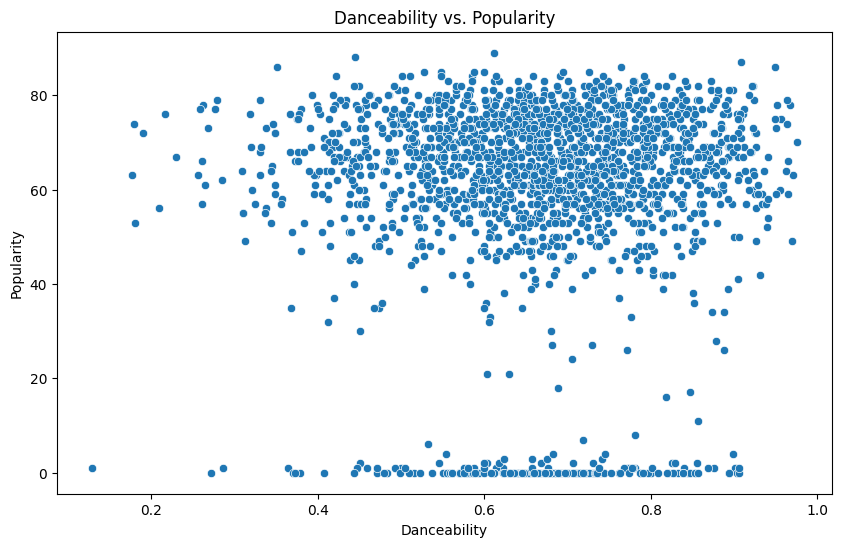

In [14]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='danceability', y='popularity', data=df)
plt.title('Danceability vs. Popularity')
plt.xlabel('Danceability')
plt.ylabel('Popularity')
plt.show()

In [15]:
import plotly.express as px

fig = px.scatter(df, x='energy', y='popularity',
                 color='genre' if 'genre' in df.columns else None,
                 hover_data=['name', 'artist_name'] if 'name' in df.columns else None,
                 title='Popularity vs Energy (Interactive)')
fig.show()

In [27]:
cells.append(nbf.new_code_cell("""
fig = px.histogram(df, x='danceability', nbins=30, title='Danceability Distribution (Interactive)')
fig.show()
"""))

In [22]:
import folium
from folium.plugins import MarkerCluster

# Only run this if latitude and longitude columns exist
if 'latitude' in df.columns and 'longitude' in df.columns:
    map_spotify = folium.Map(location=[0, 0], zoom_start=2)
    marker_cluster = MarkerCluster().add_to(map_spotify)

    for i, row in df.iterrows():
        folium.Marker(
            location=[row['latitude'], row['longitude']],
            popup=row['name'] if 'name' in df.columns else 'Track'
        ).add_to(marker_cluster)

    map_spotify
else:
    print("🛑 No location data ('latitude', 'longitude') available in this dataset.")

🛑 No location data ('latitude', 'longitude') available in this dataset.
